In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [7]:
df = pd.read_csv('Data-set.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


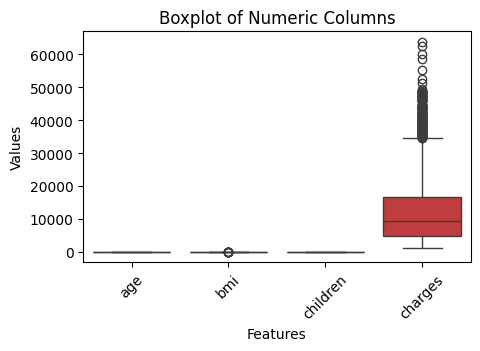

In [10]:
plt.figure(figsize=(5, 3))
sns.boxplot(data=df[['age', 'bmi', 'children', 'charges']])
plt.title('Boxplot of Numeric Columns')
plt.xlabel('Features')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()

In [11]:
def outliers_detection(dataframe, column_name):

    Q1 = dataframe[column_name].quantile(0.25)
    Q3 = dataframe[column_name].quantile(0.75)
    IQR = Q3 - Q1
    outliers = dataframe[(dataframe[column_name] < Q1 - 1.5 * IQR) | (dataframe[column_name] > Q3 + 1.5 * IQR)]

    return outliers


In [12]:
charges_outliers = outliers_detection(df, 'charges')
df.drop(charges_outliers.index, inplace=True)
charges_outliers

,age,sex,bmi,children,smoker,region,charges
14,27,male,42.130,0,yes,southeast,39611.75770
19,30,male,35.300,0,yes,southwest,36837.46700
23,34,female,31.920,1,yes,northeast,37701.87680
29,31,male,36.300,2,yes,southwest,38711.00000
30,22,male,35.600,0,yes,southwest,35585.57600
...,...,...,...,...,...,...,...
1300,45,male,30.360,0,yes,southeast,62592.87309
1301,62,male,30.875,3,yes,northwest,46718.16325
1303,43,male,27.800,0,yes,southwest,37829.72420
1313,19,female,34.700,2,yes,southwest,36397.57600


In [13]:
bmi_outliers = outliers_detection(df, 'bmi')
df.drop(bmi_outliers.index, inplace=True)
bmi_outliers

,age,sex,bmi,children,smoker,region,charges
116,58,male,49.06,0,no,southeast,11381.3254
286,46,female,48.07,2,no,northeast,9432.9253
401,47,male,47.52,1,no,southeast,8083.9198
438,52,female,46.75,5,no,southeast,12592.5345
454,32,male,46.53,2,no,southeast,4686.3887
547,54,female,46.70,2,no,southwest,11538.4210
660,37,male,46.53,3,no,southeast,6435.6237
847,23,male,50.38,1,no,southeast,2438.0552
930,26,male,46.53,1,no,southeast,2927.0647
941,50,female,46.09,1,no,southeast,9549.5651


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1186 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1186 non-null   int64  
 1   sex       1186 non-null   object 
 2   bmi       1186 non-null   float64
 3   children  1186 non-null   int64  
 4   smoker    1186 non-null   object 
 5   region    1186 non-null   object 
 6   charges   1186 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 74.1+ KB


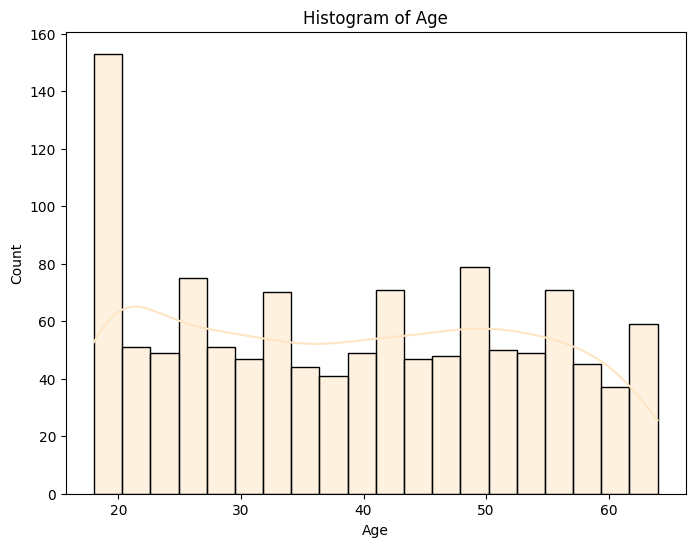

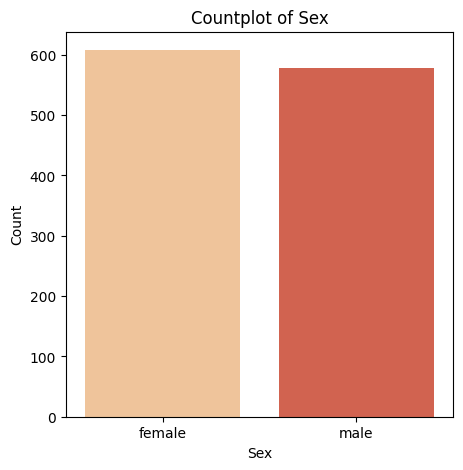

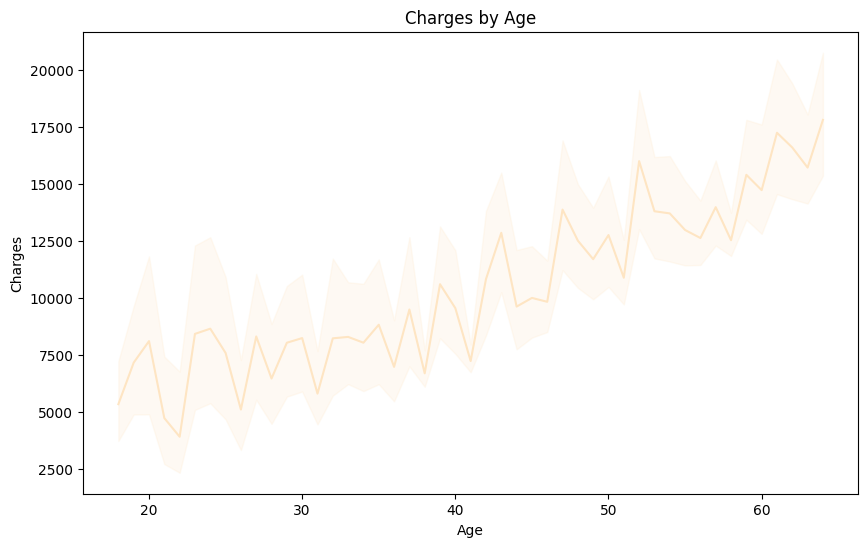

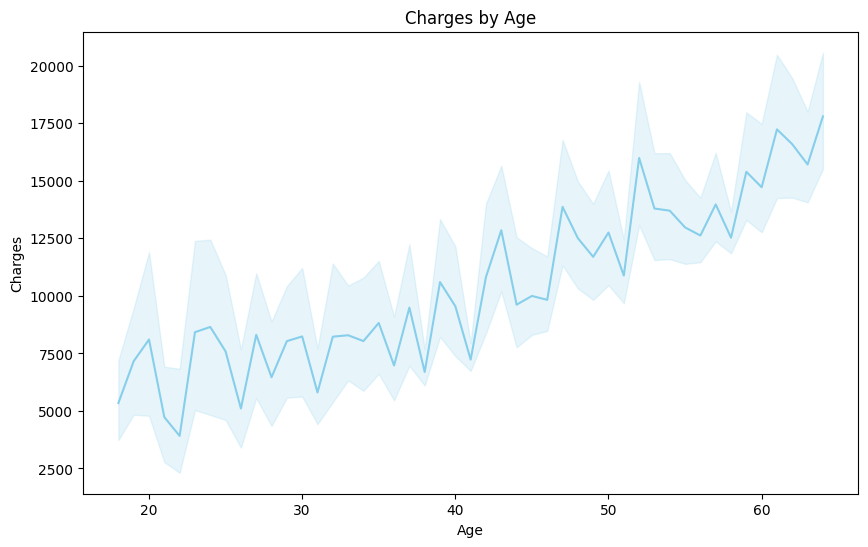

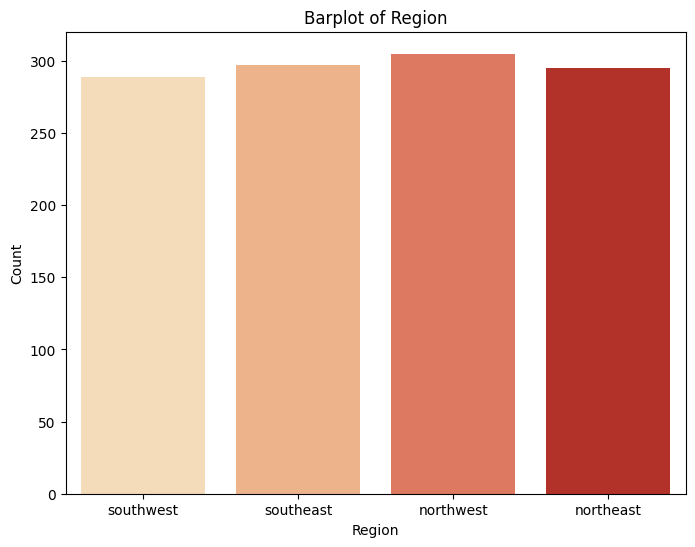

In [15]:
custom_palette = sns.color_palette('OrRd')

plt.figure(figsize=(8, 6))
sns.histplot(df['age'], bins=20, kde=True, color=custom_palette[0])
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(5, 5))
sns.countplot(x='sex', data=df, palette='OrRd')
plt.title('Countplot of Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 6))
sns.lineplot(x='age', y='charges', data=df, color=custom_palette[0])
plt.title('Charges by Age')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()

plt.figure(figsize=(10, 6))
sns.lineplot(x='age', y='charges', data=df, color='skyblue')
plt.title('Charges by Age')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(x='region', data=df, palette='OrRd')
plt.title('Barplot of Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()



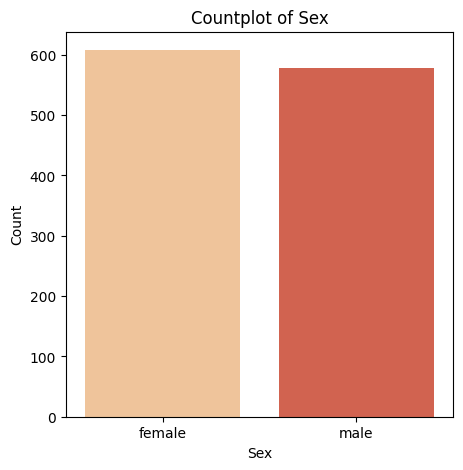

In [16]:
plt.figure(figsize=(5, 5))
sns.countplot(x='sex', data=df, palette='OrRd')
plt.title('Countplot of Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

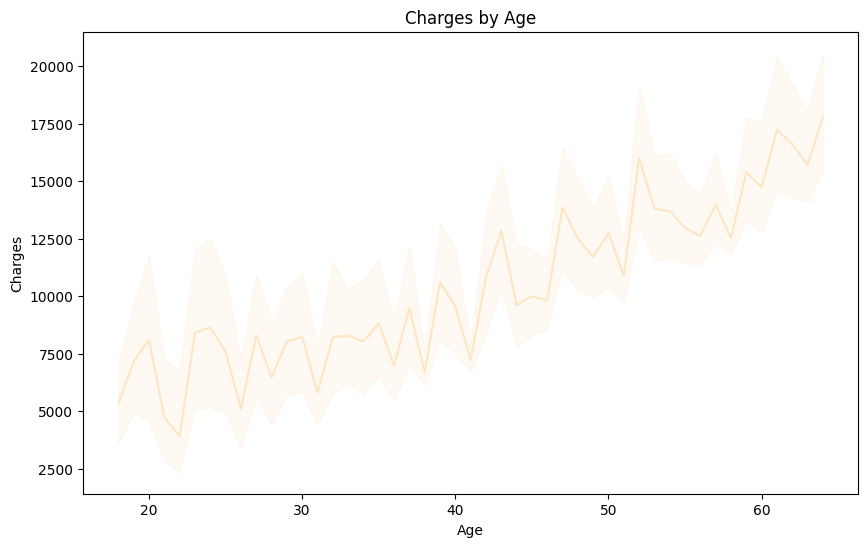

In [17]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='age', y='charges', data=df, color=custom_palette[0])
plt.title('Charges by Age')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()

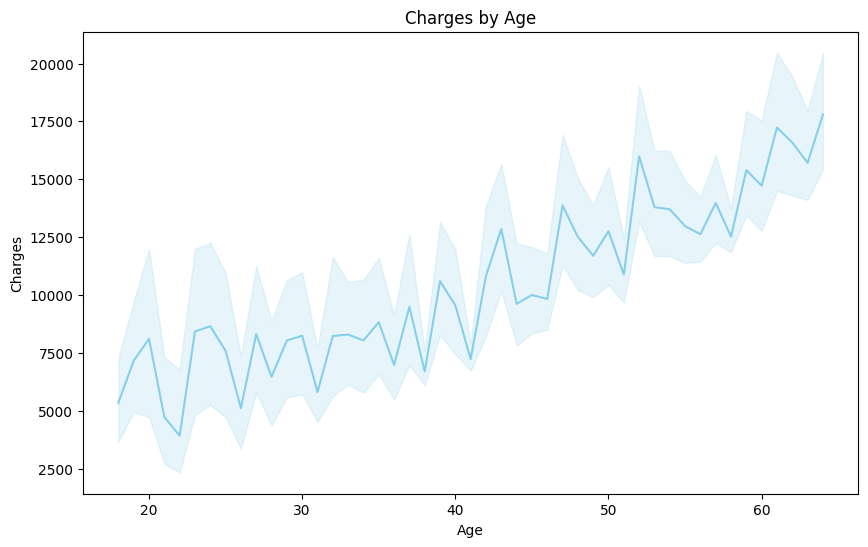

In [18]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='age', y='charges', data=df, color='skyblue')
plt.title('Charges by Age')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()

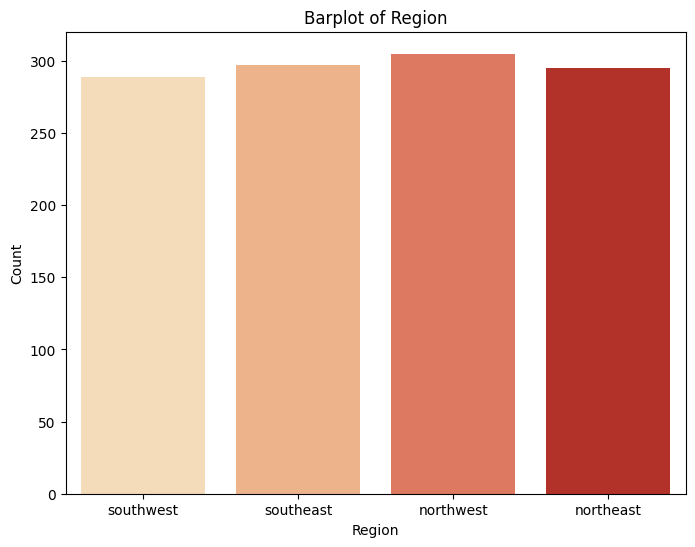

In [19]:
plt.figure(figsize=(8, 6))
sns.countplot(x='region', data=df, palette='OrRd')
plt.title('Barplot of Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()

In [20]:
df.to_csv('cleaned_data.csv')